# Project: Fake News Detection Through Natural Language Processing

## ML1010 - Group JSMCJ - Project Proposal

### Part 1: Data preparation
### Part 2: Exploratory Data Analysis 
### Part 3: Data Normalization
### Part 4: Feature Engineering
### Part 5: Modeling

## Part 1: Data preparation

### Import libraries and data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

## Real News Dataset preparation

Reading data from the csv files

In [2]:
df1 = pd.read_csv("/Users/Julia/Desktop/ML1010_Group_Project/all-the-news/articles1.csv")
df2 = pd.read_csv("/Users/Julia/Desktop/ML1010_Group_Project/all-the-news/articles2.csv")
df3 = pd.read_csv("/Users/Julia/Desktop/ML1010_Group_Project/all-the-news/articles3.csv")

We have a dataset of fake news that was collected in November 2016 (source: https://www.kaggle.com/mrisdal/fake-news/home). For our dataset of real news, we want to collect news articles that were published from October to December of 2016. That gives us ample data points we can use to build classification models.

In [3]:
df1 = df1.loc[df1['year'] == 2016.0]
df1 = df1.loc[df1['month'].isin([10.0,11.0,12.0])]
df1.head(10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...
2561,2561,20142,"Among Travelers and Commuters, the Homeless St...",New York Times,Corey Kilgannon,2016-10-14,2016.0,10.0,NaN,Wilson Silva said he knew the homeless situati...
2575,2575,20157,Bus Bombing in Jerusalem Wounds 21 - The New Y...,New York Times,Isabel Kershner,2016-10-19,2016.0,10.0,NaN,JERUSALEM — A bomb exploded on a bus in Jer...
2581,2581,20164,Syria Cease-Fire Crumbles as Bombings Kill Doz...,New York Times,Anne Barnard,2016-10-20,2016.0,10.0,NaN,"BEIRUT, Lebanon — For 38 straight days, the..."
2583,2583,20166,Iceland’s Water Cure - The New York Times,New York Times,Dan Kois,2016-10-12,2016.0,10.0,NaN,"On a frigid February day in Reykjavik, I stood..."
2592,2592,20175,"Get to Know the Historical Figures on the $5, ...",New York Times,Julie Hirschfeld Davis and Jada F. Smith,2016-12-18,2016.0,12.0,NaN,WASHINGTON — The Treasury Department announ...


In [4]:
df2 = df2.loc[df2['year'] == 2016.0]
df2 = df2.loc[df2['month'].isin([10.0,11.0,12.0])]
df2.head(10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
3654,56963,78255,Trump Time Capsule #124: Taxes,Atlantic,James Fallows,2016-10-02,2016.0,10.0,NaN,People will look back on this era in our histo...
3655,56964,78256,What Do You Know ... About Human Organs?,Atlantic,Rosa Inocencio Smith,2016-10-01,2016.0,10.0,NaN,"Each week, we collect the most surprising fact..."
3656,56965,78259,Track of the Day: ’Mary’s Song’ by Nick Cave,Atlantic,Chris Bodenner,2016-10-02,2016.0,10.0,NaN,An ongoing collection from readers of the song...
3657,56966,78260,Track of the Day: ’Baba O’Riley’ by The Who,Atlantic,Chris Bodenner,2016-10-01,2016.0,10.0,NaN,", A reader, Tim, floats an idea: Inspired by..."
3658,56967,78261,Quoted: The Uphill Battles Edition,Atlantic,Rosa Inocencio Smith,2016-10-01,2016.0,10.0,NaN,An ongoing collection of the best things we he...
3659,56968,78262,Track of the Day: ’Twin Falls’ by Built to Spill,Atlantic,Chris Bodenner,2016-10-03,2016.0,10.0,NaN,"A reader, Adam Feiges, floats an idea: I hav..."
3660,56969,78263,Trump Time Capsule #125: Willie Horton,Atlantic,James Fallows,2016-10-03,2016.0,10.0,NaN,People will look back on this era in our histo...
3661,56970,78264,Trump Time Capsule #126: My Brush With History...,Atlantic,James Fallows,2016-10-04,2016.0,10.0,NaN,People will look back on this era in our histo...
3662,56971,78265,You Think the Campaign Is Bad? Just Wait Until...,Atlantic,James Fallows,2016-10-04,2016.0,10.0,NaN,An ongoing reader discussion led by James Fall...
3663,56972,78266,Must Political Stagecraft Be Evil?,Atlantic,Matt Thompson,2016-10-04,2016.0,10.0,NaN,Megan Garber leads an ongoing reader discussio...


In [5]:
df3 = df3.loc[df3['year'] == 2016.0]
df3 = df3.loc[df3['month'].isin([10.0,11.0,12.0])]
df3.head(10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
5,103464,151914,My dad’s Reagan protests inspire me to stand u...,Guardian,Steven W Thrasher,2016-11-28,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,I have been battling depression and sleeplessn...
8,103467,151917,NSA contractor arrested for alleged theft of t...,Guardian,Ewen MacAskill,2016-10-05,2016.0,10.0,https://www.theguardian.com/us-news/2016/oct/0...,The FBI has arrested a National Security Agenc...
9,103468,151918,Donald Trump to dissolve his charitable founda...,Guardian,Ben Jacobs,2016-12-24,2016.0,12.0,https://www.theguardian.com/us-news/2016/dec/2...,Donald Trump announced on Saturday that he wil...
11,103470,151920,The strange case of Pamela Anderson’s news-hog...,Guardian,NaN,2016-10-17,2016.0,10.0,https://www.theguardian.com/media/shortcuts/20...,Name: Pamela Anderson. Age: 49. Occupation: De...
14,103473,151924,Bad moms: why messy motherhood is finally bein...,Guardian,Lara Williams,2016-10-02,2016.0,10.0,https://www.theguardian.com/tv-and-radio/2016/...,"Better Things opens with its protagonist, Sam ..."
16,103475,151926,’Trust can be restored’: Icelanders on their p...,Guardian,Guardian readers,2016-10-29,2016.0,10.0,https://www.theguardian.com/world/2016/oct/29/...,Halldora was born and raised in Iceland and cu...
26,103485,151938,Twitter to conclude sale negotiations this mon...,Guardian,NaN,2016-10-05,2016.0,10.0,https://www.theguardian.com/technology/2016/oc...,Twitter has told potential acquirers it is see...
27,103486,151939,Is our world a simulation? Why some scientists...,Guardian,Olivia Solon,2016-10-11,2016.0,10.0,https://www.theguardian.com/technology/2016/oc...,When Elon Musk isn’t outlining plans to use hi...


Now we want to examine the various publications in each csv file.

In [6]:
publications1 = np.unique(df1["publication"].values)
publications2 = np.unique(df2["publication"].values)
publications3 = np.unique(df3["publication"].values)
print(publications1)
print(publications2)
print(publications3)

['Atlantic' 'Breitbart' 'Business Insider' 'CNN' 'New York Times']
['Atlantic' 'Buzzfeed News' 'Fox News' 'Guardian' 'National Review'
 'New York Post' 'Talking Points Memo']
['Guardian' 'NPR' 'Reuters' 'Vox' 'Washington Post']


We want to select several reputable publications for the real news dataset, as well as several other 'less-reputable' publications, in order to have a more balanced representation of news published by a real news publication company. Those included are listed below.

We used a media bias/fact check website (source: https://mediabiasfactcheck.com/) to assess each news publication company. The results are below (each company is rated on their factual reporting).

Factual reporting:
- Very High: reuters, npr
- High: new york times, atlantic, guardian, washington post, vox
- Mixed: fox news, cnn, national review


In [7]:
df = pd.concat([df1,df2,df3])
df = df.loc[df['publication'].isin(['New York Times', 'CNN','Atlantic','Fox News','Guardian','National Review','NPR','Reuters', 'Vox','Washington Post'])]
df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...
2561,2561,20142,"Among Travelers and Commuters, the Homeless St...",New York Times,Corey Kilgannon,2016-10-14,2016.0,10.0,NaN,Wilson Silva said he knew the homeless situati...
2575,2575,20157,Bus Bombing in Jerusalem Wounds 21 - The New Y...,New York Times,Isabel Kershner,2016-10-19,2016.0,10.0,NaN,JERUSALEM — A bomb exploded on a bus in Jer...
2581,2581,20164,Syria Cease-Fire Crumbles as Bombings Kill Doz...,New York Times,Anne Barnard,2016-10-20,2016.0,10.0,NaN,"BEIRUT, Lebanon — For 38 straight days, the..."
2583,2583,20166,Iceland’s Water Cure - The New York Times,New York Times,Dan Kois,2016-10-12,2016.0,10.0,NaN,"On a frigid February day in Reykjavik, I stood..."
2592,2592,20175,"Get to Know the Historical Figures on the $5, ...",New York Times,Julie Hirschfeld Davis and Jada F. Smith,2016-12-18,2016.0,12.0,NaN,WASHINGTON — The Treasury Department announ...


Renaming 'content' column as 'text', to match the name of the text news variable from the fake news dataset

In [8]:
df = df.rename(columns={'content': 'text'})

In [9]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,text
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...


In [10]:
df.dtypes

Unnamed: 0       int64
id               int64
title           object
publication     object
author          object
date            object
year           float64
month          float64
url             object
text            object
dtype: object

In [11]:
df['month'] = pd.DataFrame(df['month'])

In [12]:
df['month'].dtypes

dtype('float64')

In [13]:
df['month'] = df['month'].astype(int)

In [14]:
df['month'].dtypes

dtype('int64')

In [15]:
df['month'].head()

0       12
8       12
9       12
2547    12
2551    12
Name: month, dtype: int64

In [16]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,text
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12,NaN,WASHINGTON — The human cargo was loaded on ...


In [17]:
# Selecting only columns that are common to the fake news dataset
real_news = df[['id', 'author', 'title', 'text', 'date', 'month', 'url']]

In [18]:
# Creating a Target variable called "fake".  It will have a value of 0 for real news and 1 for fake news
real_news["fake"] = 0

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
real_news.head()

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


In [20]:
real_news.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url', 'fake'], dtype='object')

In [21]:
real_news.shape

(15712, 8)

In [22]:
# Saving data frame as a new csv file called "real_news.csv".
real_news.to_csv('real_news.csv', encoding='utf-8')

## Fake News Dataset preparation

In [50]:
fake = pd.read_csv("/Users/Julia/Desktop/ML1010_Group_Project/all-the-news/fake.csv")

In [51]:
fake.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [52]:
fake.shape

(12999, 20)

In [53]:
fake.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [54]:
english_fake_news = fake[fake["language"] == "english"]

In [55]:
english_fake_news.shape

(12403, 20)

In [56]:
all_fake_news = english_fake_news[english_fake_news["type"] == "bs"]

In [57]:
all_fake_news.shape

(10900, 20)

In [58]:
all_fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,0,tokyowashi (noreply@blogger.com),2016-10-27T06:14:00.000+03:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,english,2016-10-27T07:37:58.775+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
60,03905a0f06cb711190aad3934af253a0e1c00a83,1,Anonymous,2016-10-26T23:12:00.000+03:00,NaN,"So ,you have Rothschild banksters and British ...",english,2016-10-27T07:37:58.893+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
61,42c16d3818e64ff4632409cafd309c22df530ac1,2,Anonymous,2016-10-26T22:48:00.000+03:00,NaN,Here is the problem . The USA constitution sta...,english,2016-10-27T07:37:58.902+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,3,Anonymous,2016-10-26T22:35:00.000+03:00,NaN,There is plenty of proof the machines are rigg...,english,2016-10-27T07:37:58.915+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
63,ea086a28e0bbafcd9fbaabd728920337371d4876,4,Anonymous,2016-10-26T22:19:00.000+03:00,NaN,Trump has an excuse now to audit any vote with...,english,2016-10-27T07:37:58.925+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs


In [59]:
# Count missing values
all_fake_news.isnull().sum()

uuid                     0
ord_in_thread            0
author                1731
published                0
title                  573
text                     0
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           3990
thread_title            12
spam_score               0
main_img_url          3310
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [60]:
# Visual observation of the CSV file reveals that 'title' = 'thread_title'.  
# Therefore, for the cases where title is missing, we can impute the thread_title. 
# We will also replace the Nulls in 'text' with blanks ('')
if all_fake_news['title'] is None:
    all_fake_news['title'] = all_fake_news['thread_title']
else:
    all_fake_news['title'] is None and all_fake_news['thread_title'] is None
    all_fake_news['title'] = ''

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
# Count missing values again
all_fake_news.isnull().sum()

uuid                     0
ord_in_thread            0
author                1731
published                0
title                    0
text                     0
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           3990
thread_title            12
spam_score               0
main_img_url          3310
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [62]:
all_fake_news.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [63]:
pd.to_datetime(all_fake_news['published'], format='%Y-%m-%d %H:%M:%S.%f')

59      2016-10-27 03:14:00.000
60      2016-10-26 20:12:00.000
61      2016-10-26 19:48:00.000
62      2016-10-26 19:35:00.000
63      2016-10-26 19:19:00.000
64      2016-10-26 19:07:00.000
65      2016-10-26 19:07:00.000
66      2016-10-26 19:35:00.000
67      2016-10-26 19:19:00.000
68      2016-10-26 19:07:00.000
69      2016-10-28 00:19:50.476
70      2016-10-27 18:50:00.000
71      2016-10-27 18:30:00.000
72      2016-10-27 20:03:00.000
73      2016-10-27 19:57:00.000
74      2016-10-27 18:50:00.000
75      2016-10-27 18:30:00.000
76      2016-10-27 18:50:00.000
77      2016-10-27 18:30:00.000
78      2016-10-27 18:30:00.000
79      2016-10-28 11:03:12.156
80      2016-10-28 08:58:00.000
81      2016-10-28 20:31:03.391
82      2016-10-28 17:39:00.000
83      2016-10-28 17:00:00.000
84      2016-10-29 08:56:37.068
85      2016-10-29 06:34:00.000
86      2016-10-29 12:58:39.811
87      2016-10-29 07:38:00.000
88      2016-10-29 20:54:43.950
                  ...          
12969   

In [64]:
all_fake_news['published'].dtypes

dtype('O')

In [65]:
all_fake_news['published'] = pd.to_datetime(fake['published'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
all_fake_news['published'].head()

59   2016-10-27 03:14:00
60   2016-10-26 20:12:00
61   2016-10-26 19:48:00
62   2016-10-26 19:35:00
63   2016-10-26 19:19:00
Name: published, dtype: datetime64[ns]

In [67]:
all_fake_news['published'].dtypes

dtype('<M8[ns]')

In [68]:
all_fake_news['month'] = all_fake_news['published'].dt.month

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
all_fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,month
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,0,tokyowashi (noreply@blogger.com),2016-10-27 03:14:00,,United States Marine Field McConnell Plum Cit...,english,2016-10-27T07:37:58.775+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
60,03905a0f06cb711190aad3934af253a0e1c00a83,1,Anonymous,2016-10-26 20:12:00,,"So ,you have Rothschild banksters and British ...",english,2016-10-27T07:37:58.893+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
61,42c16d3818e64ff4632409cafd309c22df530ac1,2,Anonymous,2016-10-26 19:48:00,,Here is the problem . The USA constitution sta...,english,2016-10-27T07:37:58.902+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,3,Anonymous,2016-10-26 19:35:00,,There is plenty of proof the machines are rigg...,english,2016-10-27T07:37:58.915+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
63,ea086a28e0bbafcd9fbaabd728920337371d4876,4,Anonymous,2016-10-26 19:19:00,,Trump has an excuse now to audit any vote with...,english,2016-10-27T07:37:58.925+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10


In [70]:
all_fake_news.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type', 'month'],
      dtype='object')

In [71]:
real_news.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url', 'fake'], dtype='object')

In [72]:
# Renaming columns to have same name as columns of the 'real' news dataset
all_fake_news = all_fake_news.rename(columns={'uuid': 'id', 'published': 'date', 'site_url': 'url'})

In [73]:
all_fake_news.columns

Index(['id', 'ord_in_thread', 'author', 'date', 'title', 'text', 'language',
       'crawled', 'url', 'country', 'domain_rank', 'thread_title',
       'spam_score', 'main_img_url', 'replies_count', 'participants_count',
       'likes', 'comments', 'shares', 'type', 'month'],
      dtype='object')

In [74]:
# Selecting only columns that are common with the real news dataset
fake_news = all_fake_news[['id', 'author', 'title', 'text', 'date', 'month','url']]

In [75]:
fake_news.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url'], dtype='object')

In [76]:
fake_news.shape

(10900, 7)

In [77]:
# Creating a Target variable called "fake".  It will have a value of 0 for real news and 1 for fake news
fake_news["fake"] = 1

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
fake_news.shape

(10900, 8)

In [79]:
fake_news.head()

,id,author,title,text,date,month,url,fake
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,tokyowashi (noreply@blogger.com),,United States Marine Field McConnell Plum Cit...,2016-10-27 03:14:00,10,abeldanger.net,1
60,03905a0f06cb711190aad3934af253a0e1c00a83,Anonymous,,"So ,you have Rothschild banksters and British ...",2016-10-26 20:12:00,10,abeldanger.net,1
61,42c16d3818e64ff4632409cafd309c22df530ac1,Anonymous,,Here is the problem . The USA constitution sta...,2016-10-26 19:48:00,10,abeldanger.net,1
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,Anonymous,,There is plenty of proof the machines are rigg...,2016-10-26 19:35:00,10,abeldanger.net,1
63,ea086a28e0bbafcd9fbaabd728920337371d4876,Anonymous,,Trump has an excuse now to audit any vote with...,2016-10-26 19:19:00,10,abeldanger.net,1


In [80]:
# Saving data frame as a new csv file called "fake_news.csv".
fake_news.to_csv('fake_news.csv', encoding='utf-8')

### Merging real_news and fake_news datasets

In [81]:
frames = [real_news, fake_news]

In [82]:
real_fake = pd.concat(frames)

In [83]:
real_fake.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url', 'fake'], dtype='object')

In [84]:
real_fake.shape

(26612, 8)

In [85]:
real_fake.head()

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


In [86]:
# converting target variable ("fake" column) to "category" (factor)
real_fake['fake'] = real_fake.fake.astype('category')

In [87]:
real_fake.dtypes

id          object
author      object
title       object
text        object
date        object
month        int64
url         object
fake      category
dtype: object

### Saving data frame as a new csv file called "real_fake_news.csv".

In [89]:
real_fake.to_csv('real_fake_news_v3.csv', encoding='utf-8')

## Part 2: Exploratory Data Analysis (EDA)

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.stats as spstats
import datetime
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
import nltk
# nltk.download('punkt')  ## run this command only if you don't have the 'punkt' package already installed
import spacy
nlp = spacy.load('en', parse = False, tag=False, entity=False)
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [91]:
all_news = real_fake

In [92]:
all_news.head(5)

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


## Dataframe dimensions and data types

In [93]:
all_news.shape

(26612, 8)

In [94]:
all_news.dtypes

id          object
author      object
title       object
text        object
date        object
month        int64
url         object
fake      category
dtype: object

In [95]:
# converting month variable to "category" (factor)
all_news['month'] = all_news.month.astype('category')

In [96]:
all_news.dtypes

id          object
author      object
title       object
text        object
date        object
month     category
url         object
fake      category
dtype: object

## Summary statistics

In [97]:
all_news.describe()

,id,author,title,text,date,month,url,fake
count,26612,23136,26612,26612,26612,26612,22001,26612
unique,26612,6298,15705,26141,10298,3,11311,2
top,bd07c09df8ee55979588df70ca42c222ccde664c,admin,,,2016-11-09,11,russia-insider.com,0
freq,1,199,10900,104,252,10816,100,15712


### Counts categorical data

In [98]:
all_news['fake'].value_counts()

0    15712
1    10900
Name: fake, dtype: int64

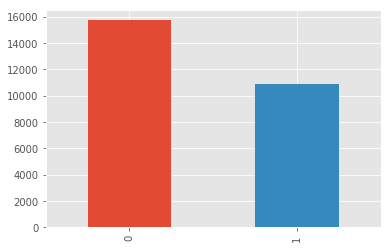

In [99]:
all_news['fake'].value_counts().plot(kind='bar')

In [100]:
all_news['month'].value_counts()

11    10816
10    10483
12     5313
Name: month, dtype: int64

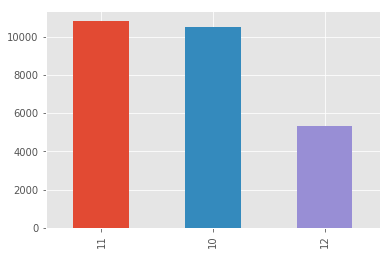

In [101]:
all_news['month'].value_counts().plot(kind='bar')

## Count missing values

In [102]:
all_news.isnull().sum()
# Author and url have missing values, but they are not relevant features for our analysis.  
# No missing values in titles and text

id           0
author    3476
title        0
text         0
date         0
month        0
url       4611
fake         0
dtype: int64

## Part 3: Text Normalization

### Preparing Text-only Dataset

### Merging title and text for text analysis

For purposes of text mining, we concatenate the title and text of the news article and use this merged field for news text analysis.

In [103]:
all_text = all_news.title.str.cat(all_news.text, sep=' ')

In [104]:
all_text.head()

0       House Republicans Fret About Winning Their Hea...
8       First, a Mixtape. Then a Romance. - The New Yo...
9       Calling on Angels While Enduring the Trials of...
2547    U.S. Plans to Step Up Military Campaign Agains...
2551    272 Slaves Were Sold to Save Georgetown. What ...
Name: title, dtype: object

## James, I think Normalization code would go here, before running anything else below.  Plese insert the normalization code here if you agree

### Count missing values in the text data

In [105]:
if all_text is None:
    print(all_text)
# No output - there are no missing values in the text for mining

### Save new dataframe as csv

In [106]:
all_text.to_csv('all_text.csv')

## Part 4: Feature Engineering

### Tokenization with NLTK

In [107]:
# Fill any blank fields
all_text.fillna("", inplace=True)

In [108]:
words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [109]:
words_df = pd.DataFrame(words)

In [110]:
words_df.head()

,0
0,House
1,Republicans
2,Fret
3,About
4,Winning


### Cleaning/Stopword removal with NLTK

In [111]:
from nltk.corpus import stopwords
import string

# cleaning
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

### Wordcloud

In [112]:
from wordcloud import WordCloud, STOPWORDS

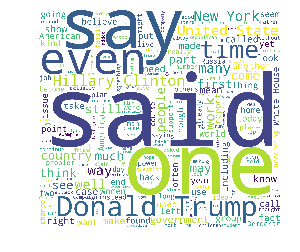

In [114]:
# creating wordcloud (i.e., visual representation of text data) 
# the wordcloud displays a list of words, the importance of each beeing shown with font size or color

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1800
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

### Bigram Analysis with NLTK

In [115]:
# Bigrams (pairs of consecutive written units like letters, syllables, or words)

bigrams = nltk.bigrams(cleanwords)

In [116]:
# most common bigrams

from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('Donald', 'Trump'), 18558), (('Hillary', 'Clinton'), 13822), (('United', 'States'), 12822), (('New', 'York'), 11405), (('White', 'House'), 6787), (('York', 'Times'), 4456), (('The', 'New'), 3525), (('years', 'ago'), 3325), (('President', 'Obama'), 3105), (('Washington', 'Post'), 3079)]


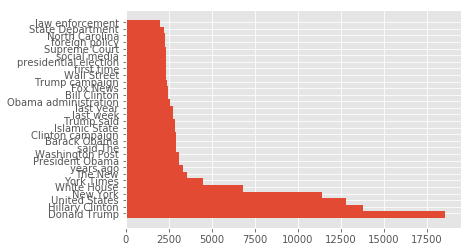

In [117]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

##  *** ~ Feature engineering - To be completed ~ ***

###    Tokenization with other methods: Spacy, tfidf...... other

### Lemmatization

### Vectorizing Raw Text

### ...maybe some Topic Modeling as well